# Imports e Deps

In [ ]:
#!pip install kaggle já tem no colab

import numpy as np
import pandas as pd
import os
from google.colab import userdata


import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

from sklearn.metrics import f1_score

#Modelos Usados
!pip install catboost xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Outros
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

# Começando os trabalhos

Logue em https://www.kaggle.com/settings e pegue a apikey, clica na chave do lado esquerdo e adicione os segredos *kaggle_username* e *kaggle_key* com os valores que estão dentro de kaggle.json


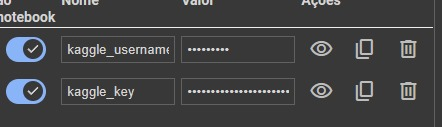

In [ ]:
os.environ['KAGGLE_USERNAME'] = userdata.get('kaggle_username')
os.environ['KAGGLE_KEY'] = userdata.get('kaggle_key')

In [ ]:
!kaggle datasets download -d shriyashjagtap/fraudulent-e-commerce-transactions --unzip

Dataset URL: https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions
License(s): MIT
 86% 136M/159M [00:00<00:00, 246MB/s]
100% 159M/159M [00:00<00:00, 230MB/s]


In [ ]:
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.shape

(23634, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [ ]:
px.box(data_frame=df,x="Customer Age",width=500,height=300)

## Tratando e analizando dados

Probleminha aqui que a idade minima é < 0, precisamos consertar isso

In [ ]:
mean_age = np.round(df['Customer Age'].mean(),0)
df['Customer Age'] = np.where(df['Customer Age'] < 9, mean_age, df['Customer Age'])

é um dataframe incrivelmente desbalanceado

In [ ]:
print('Genuino:', round(df['Is Fraudulent'].value_counts()[0]/len(df) * 100,2), '%')
print('Fraudulento:', round(df['Is Fraudulent'].value_counts()[1]/len(df) * 100,2), '%')

Genuino: 94.83 %
Fraudulento: 5.17 %


Antes de remover dados desnecessarios, podemos combinar shipping e billing address

In [ ]:
df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)

Removendo dados desnecessarios

In [ ]:
df.drop(["Transaction ID","Customer ID","Customer Location","Transaction Date","IP Address","Shipping Address","Billing Address"], axis=1, inplace=True)

In [ ]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Is Address Match
0,42.32,PayPal,electronics,1,40.0,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35.0,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29.0,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45.0,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42.0,desktop,0,116,15,1


# Relação dos atributos

Vamos discutir e analisar os dados a fim de responder se podemos encontrar perfis especificos ou caracteristicas de clientes que tem mais chance de estarem envolvidos com fraude.

Além de encontrar se existem atributos que são mais importantes/contribuem mais para uma probaiblidade maior da transação ser fraudulenta

In [ ]:
fraud_groups = df.groupby('Is Fraudulent')

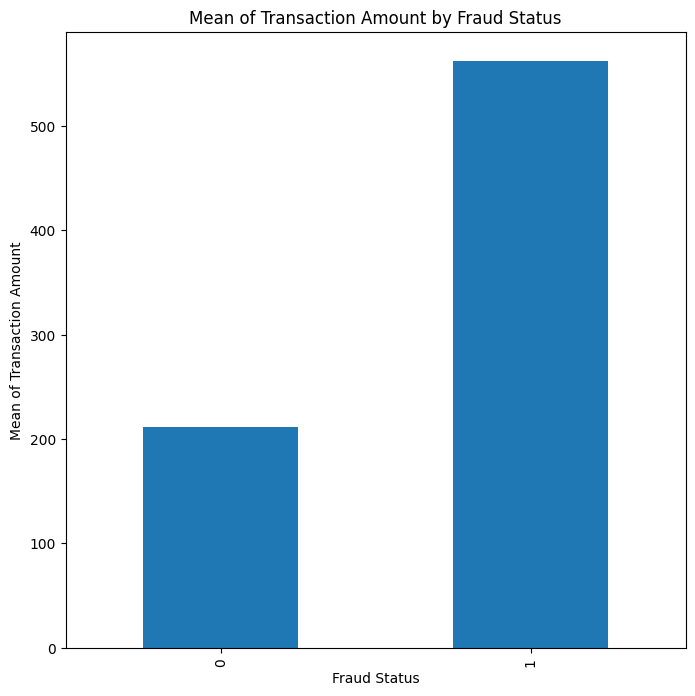

In [ ]:
feature_mean = fraud_groups['Transaction Amount'].mean()
plt.figure(figsize=(8, 8))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Transaction Amount')
plt.title('Mean of Transaction Amount by Fraud Status')
plt.show()

Aqui vemos que a média de dinheiro gasto na transação fraudulenta é muito maior

# Analises que não mostraram nada relevante

Text(0.5, 1.0, 'Fraudulent Distribution Based on Payment Method')

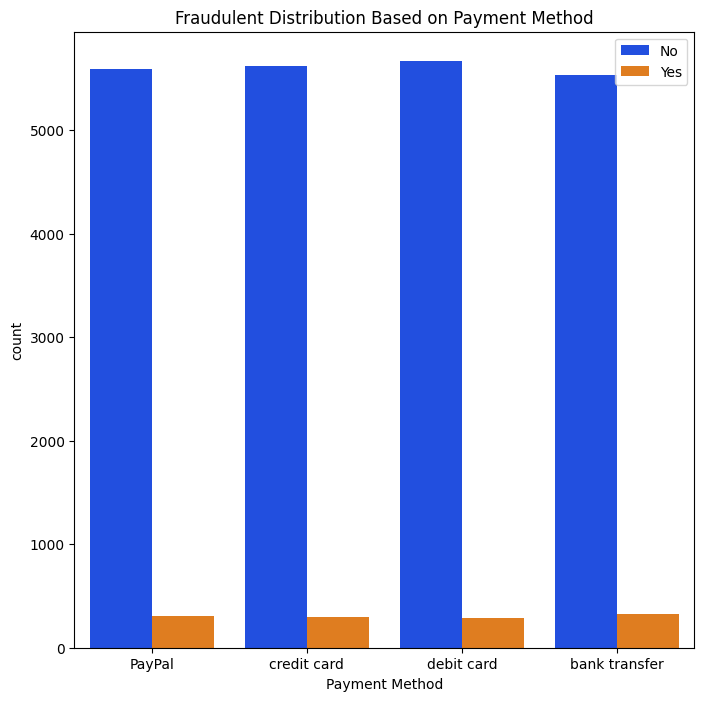

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Payment Method", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Payment Method')

Text(0.5, 1.0, 'Fraudulent Distribution Based on Product Category')

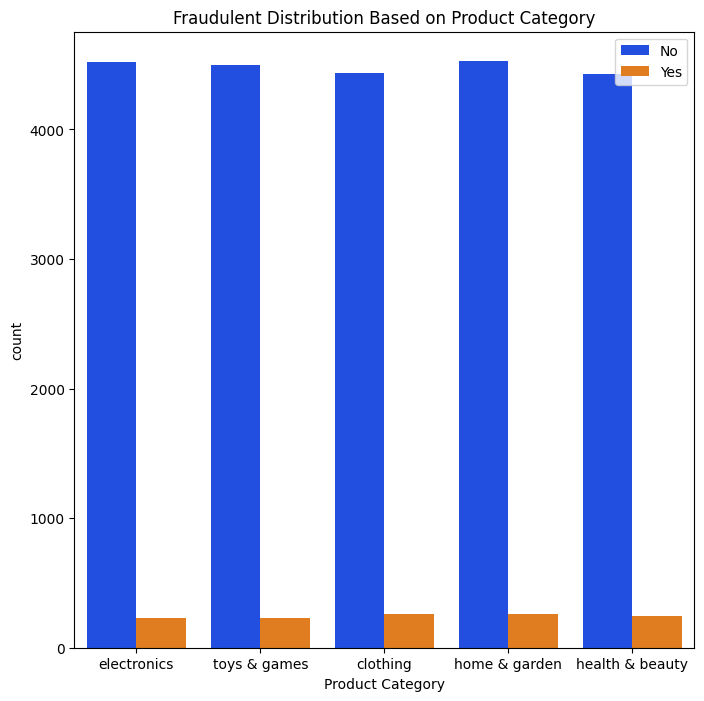

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Product Category", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Product Category')

Text(0.5, 1.0, 'Fraudulent Distribution Based on Quantity')

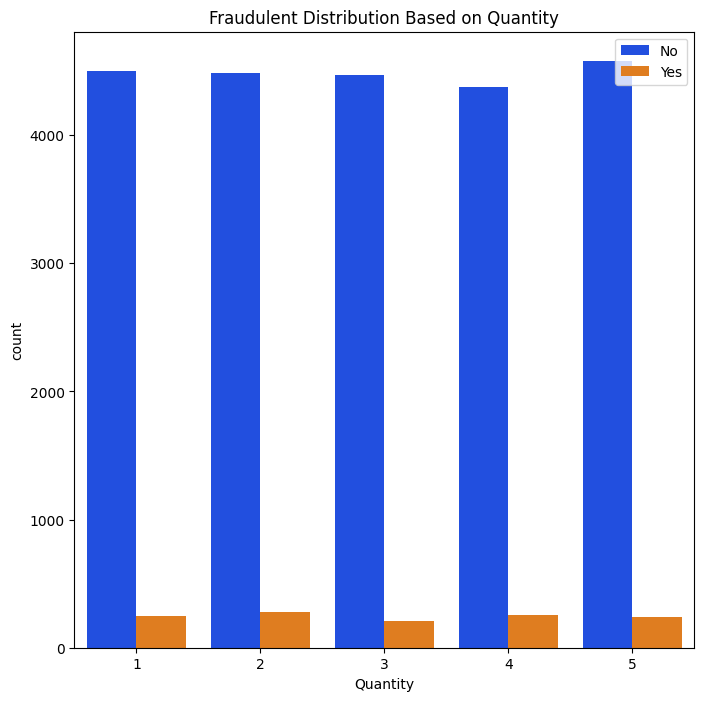

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Quantity", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Quantity')

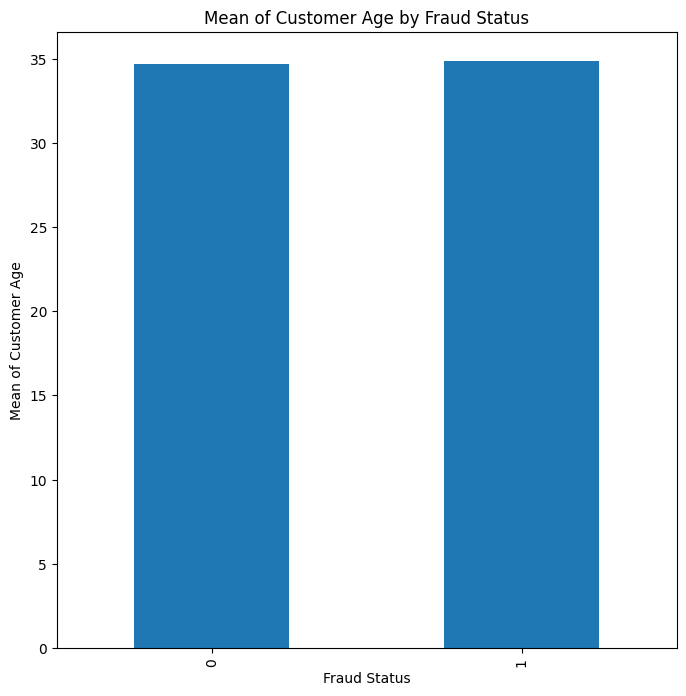

In [ ]:
feature_mean = fraud_groups['Customer Age'].mean()
plt.figure(figsize=(8, 8))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Customer Age')
plt.title('Mean of Customer Age by Fraud Status')
plt.show()

Text(0.5, 1.0, 'Fraudulent Distribution Based on Device Used')

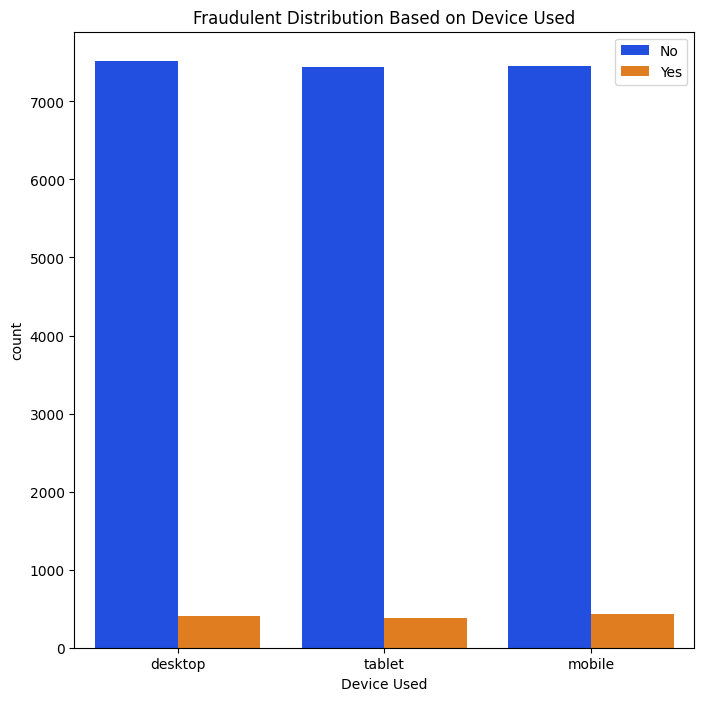

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Device Used", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Device Used')

# Analises que mostraram relavancia

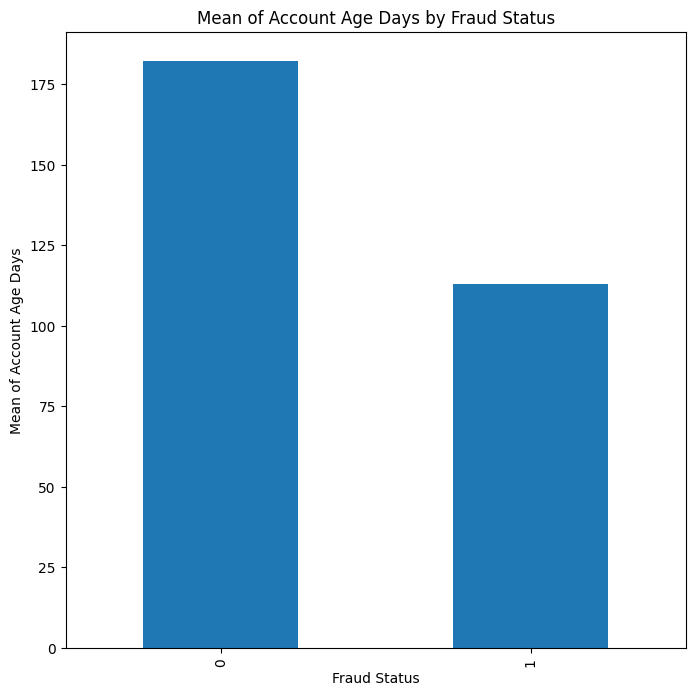

In [ ]:
feature_mean = fraud_groups['Account Age Days'].mean()
plt.figure(figsize=(8, 8))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Account Age Days')
plt.title('Mean of Account Age Days by Fraud Status')
plt.show()

Contas envolvidas em fraude são mais novas

Text(0.5, 1.0, 'Fraudulent Distribution Based on Transaction Hour')

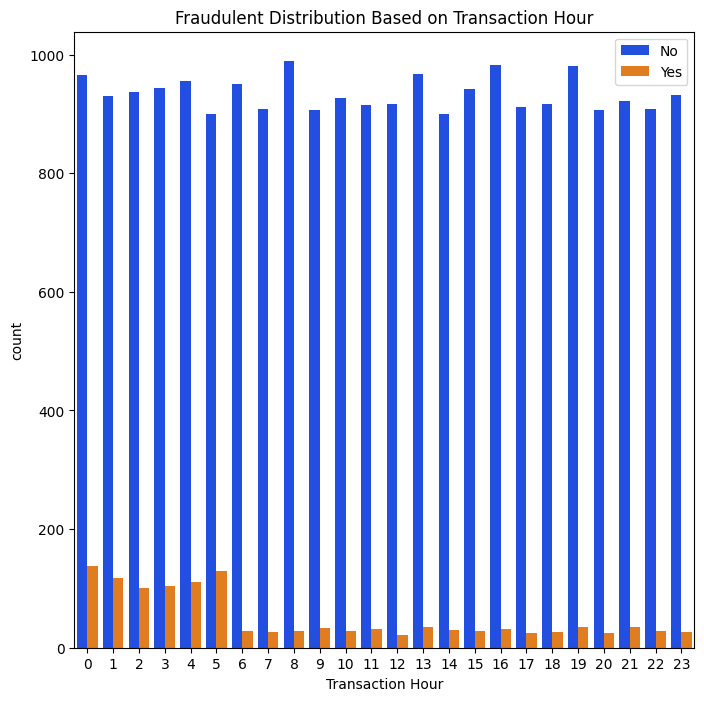

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Transaction Hour", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Transaction Hour')

Text(0.5, 1.0, 'Fraudulent Distribution Based on Address Match')

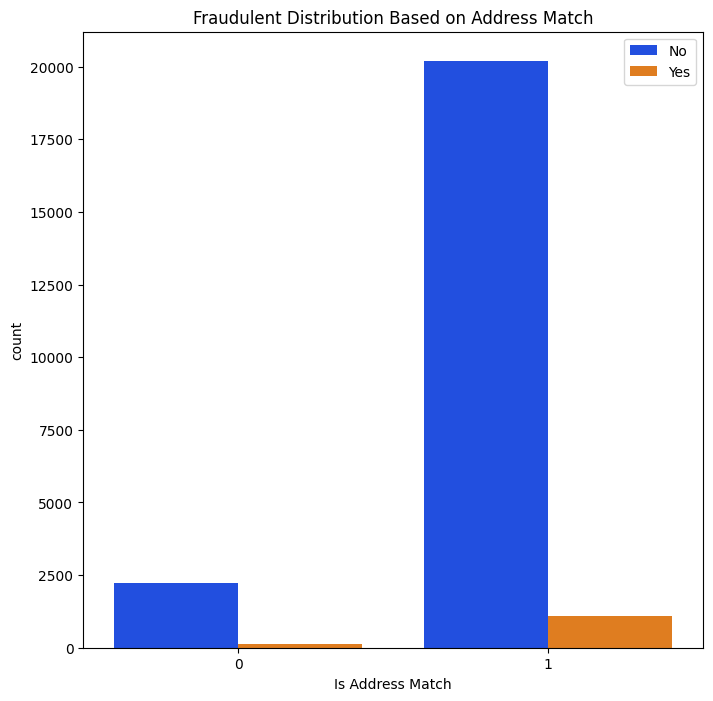

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Is Address Match", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Address Match')

Resumindo :


*   Média de valores $ nas transações fraudulentas muito maior
*   Contas mais novas envolvidas em fraude
*   Fraudes ocorrem muito mais entre 00hr - 5hr



# Tratando os dados categoricos

In [ ]:
# Identifique todas as colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Crie um mapeamento para cada coluna categórica
for column in categorical_columns:
    df[column], mapping_index = pd.factorize(df[column])
    # Opcional: Crie um dicionário para visualizar o mapeamento
    mapping = dict(zip(mapping_index, range(len(mapping_index))))
    print(f"Mapping for {column}: {mapping}")

# Verifique as mudanças
display(df)

Mapping for Payment Method: {'PayPal': 0, 'credit card': 1, 'debit card': 2, 'bank transfer': 3}
Mapping for Product Category: {'electronics': 0, 'toys & games': 1, 'clothing': 2, 'home & garden': 3, 'health & beauty': 4}
Mapping for Device Used: {'desktop': 0, 'tablet': 1, 'mobile': 2}


,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Is Address Match
0,42.32,0,0,1,40.0,0,0,282,23,1
1,301.34,1,0,3,35.0,1,0,223,0,1
2,340.32,2,1,5,29.0,0,0,360,8,0
3,95.77,1,0,5,45.0,2,0,325,20,1
4,77.45,1,2,5,42.0,0,0,116,15,1
...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,1,5,32.0,1,0,363,16,1
23630,47.42,1,2,4,41.0,0,0,296,17,1
23631,1045.23,3,4,1,9.0,1,0,329,23,1
23632,34.25,2,3,2,39.0,2,0,347,11,1


# Gerando e testando modelos

In [ ]:
# @title Variaveis Usadas
cv = 20 # @param ["5", "10", "15", "20", "25"] {type:"raw"}
n_splits = 10 # @param ["5", "10", "15", "20"] {type:"raw"}
random_state_number = 21 # @param {type:"slider", min:0, max:100, step:1}

Divide o conjunto de dados em k folds de forma que cada fold tenha aproximadamente a mesma proporção de classes que o conjunto de dados completo.
Se não usarmos isso o conjunto de treinamento ou teste pode não ter fraude

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state_number)

## Gerando conjunto de testes

In [ ]:
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X.shape, y.shape

((23634, 9), (23634,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Definindo Modelos e Parametros que serão usados

### Boosting

- Método Ensemble
- Principal diferença é que ele treina os weak learners sequencialmente, corrigindo os erros do antecessor
- Dessa forma, as informações que foram classificadas corretamente vão ter pesos menores que as que não foram
- Esse processo é feito até um critério de parada ser alcançado

### Gradient Boosting
- Usa Gradiente Descendente para minimizar a função de perda

 ![](https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png)

### XGBoost

- Uma das implementações mais populares do Gradient Boosting
- Usa paralelismo, tendo um desempenho bom
- Usa técnicas para evitar o overfitting
- Lida automaticamente com valores ausentes

### CatBoost
- O principal diferencial do método é que ele dispensa o pré-processamento de atributos categóricos
- Evita o overfitting

### LightGBM
- Foca na velocidade e em usar menos memória
- Diferentemente dos outros métodos, a expansão da árvore se dá apenas nas folhas que mais minimizarem a função de perda

### LogisticRegression
- Muito usado para problemas de classificação binária
- Usa uma função sigmóide para classificar o valor dos atributos

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter = 1000, random_state=random_state_number),
    'SVC': LinearSVC(class_weight='balanced', max_iter = 10000, dual=False),
    'CatBoost': CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=random_state_number, task_type='GPU'),
    'XGBoost': XGBClassifier(random_state=random_state_number, use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=random_state_number, verbose=-1, device="gpu"),
}

# parâmetros
params = {
    'RandomForest': {
      'n_estimators': [10, 100, 300],
      'random_state': [random_state_number]
    },
    'LogisticRegression': {
      'C': [0.01, 0.1, 1, 10, 100, 1000],
      'solver': ['liblinear', 'lbfgs'],
      'random_state': [random_state_number]
    },
    'SVC': {
      'C': [0.1, 1, 10],
      'random_state': [random_state_number]
    },
    'CatBoost': {
      'iterations': [10, 100, 300],
      'learning_rate': [0.01, 0.1, 0.3],
      'depth': [3, 6],
      'random_state': [random_state_number]
    },
    'XGBoost': {
      'n_estimators': [10, 100, 300],
      'learning_rate': [0.01, 0.1, 0.3],
      'max_depth': [3, 6],
      'random_state': [random_state_number]
    },
    'LightGBM': {
      'n_estimators': [50, 100, 300],
      'learning_rate': [0.01, 0.1, 0.3],
      'num_leaves': [21, 42, 63],
      'random_state': [random_state_number]
    },
}

## Sem Oversample/Undersample

In [ ]:
X_trainB, X_test, y_trainB, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_number, stratify=y)
X_train, y_train = X_trainB, y_trainB

Achar o melhor modelo com melhor parametro usando GridSearch

RandomForest
 Best parameters: {'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.17994950557542605


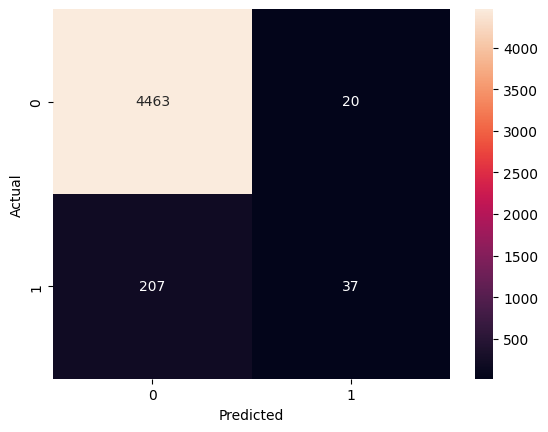

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.18197278911564627

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.6821165579633915


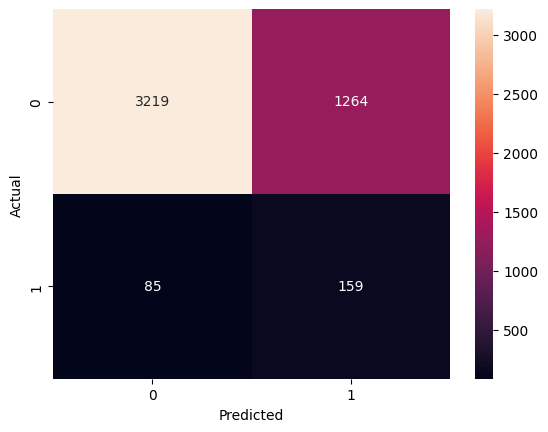

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6839923469387755

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6780138859667578


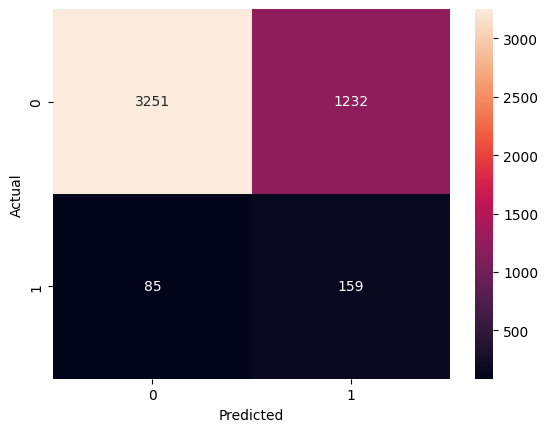

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6798894557823129

CatBoost
 Best parameters: {'depth': 3, 'iterations': 10, 'learning_rate': 0.01, 'random_state': 21}
 Best recall score: 0.8241636860929938


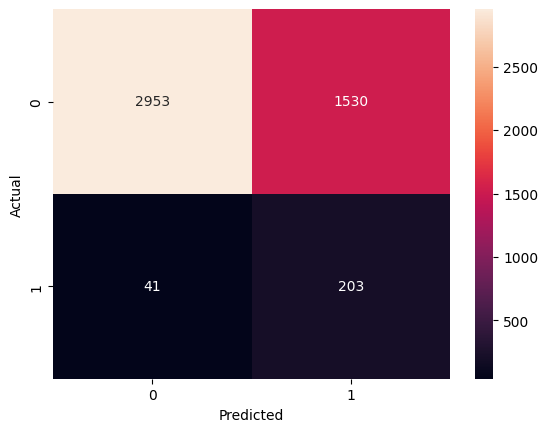

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.8241071428571429

XGBoost
 Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.2106564275194614


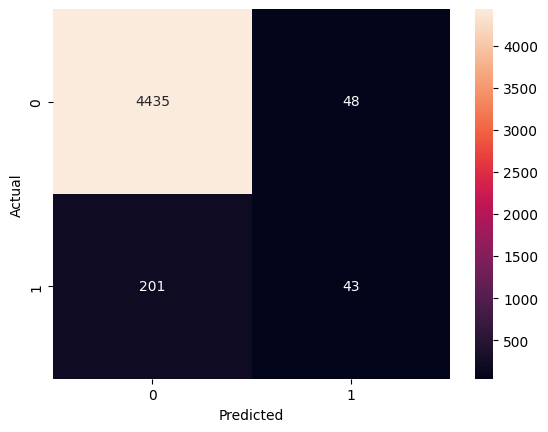

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.20450680272108843

LightGBM
 Best parameters: {'learning_rate': 0.3, 'n_estimators': 50, 'num_leaves': 63, 'random_state': 21}
 Best recall score: 0.20969913738691354


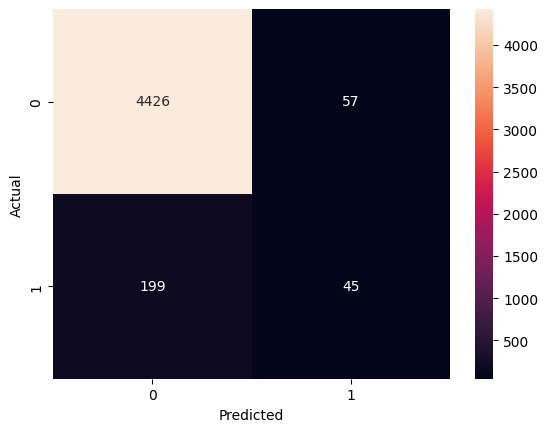

 Valores de Cross Validation
 Average Cross Validation Recall score: 0.21877125850340134



In [ ]:
no_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_no = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_no.best_params_)
  print(' Best recall score:', grid_no.best_score_)


  y_pred = grid_no.predict(X_test)
  from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  #print(cm)

  print(" Valores de Cross Validation")
  score_no = cross_val_score(grid_no.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  score_no_mean = score_no.mean()
  print(" Average Cross Validation Recall score: {}".format(score_no.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'No Under/Oversampling',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_no_mean,
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  no_score = pd.concat([no_score, score], ignore_index=True)

  print()

In [ ]:
display(no_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,No Under/Oversampling,0.151639,0.181973,0.649123,0.245847,0.951978
1,LogisticRegression,No Under/Oversampling,0.651639,0.683992,0.111736,0.190762,0.714618
2,SVC,No Under/Oversampling,0.651639,0.679889,0.114306,0.194495,0.721388
3,CatBoost,No Under/Oversampling,0.831967,0.824107,0.117138,0.205362,0.667654
4,XGBoost,No Under/Oversampling,0.176230,0.204507,0.472527,0.256716,0.947324
5,LightGBM,No Under/Oversampling,0.184426,0.218771,0.441176,0.260116,0.945843


## Samples

Como Mostrado nos resultados dos algoritimos anteriores, conjuntos desblanceados não são muito bons para grande parte dos modelos, por isso temos que fazer estrategias de sample para poder balancear os dados de modo que os algoritimos trabalhem de forma eficiente

## RandomOverSample

### RandomOverSample

* Indentifica a classe minoritaria do conjunto, no nosso caso as fraudes confirmadas
* Duplica aleatoriamente essas amostras até que chegue a mesma quantidade da classe majoritaria, no caso não ser fraude
* Vantagem: Em alguns modelos o desbalanceamento afeta muito a performace, com essa sample fica balanceado
* Desvantagem: Overfitting

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=random_state_number)

X_train, y_train = ros.fit_resample(X_trainB, y_trainB)

print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('Total:', round(y_train.value_counts()[0] + y_train.value_counts()[1]))

Genuine: 17929 / 50.0 % of the dataset
Frauds: 17929 / 50.0 % of the dataset
Total: 35858


Achar o melhor modelo com melhor parametro usando GridSearch

In [ ]:
rover_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_over = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_over.best_params_)
  print(' Best recall score:', grid_over.best_score_)


  y_pred = grid_over.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  #print(cm)

  print(" Valores de Cross Validation")
  score_rover = cross_val_score(grid_over.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  # print(" Cross Validation Recall scores are: {}".format(score_rover))
  score_rover_mean = score_rover.mean()
  print(" Average Cross Validation Recall score: {}".format(score_rover.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'Random Oversampling',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_rover_mean,
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  rover_score = pd.concat([rover_score, score], ignore_index=True)

  print()

RandomForest
 Best parameters: {'n_estimators': 10, 'random_state': 21}
 Best recall score: 1.0
 Valores de Cross Validation
 Average Cross Validation Recall score: 1.0

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.6858714880786392
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6861520669095398

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6814097544518365
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6802956780538303

CatBoost
 Best parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.3, 'random_state': 21}
 Best recall score: 0.999442275515895
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.9998325892857143

XGBoost
 Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'random_state': 21}
 Best recall score: 1.0
 Valores de Cross Validation
 Average Cross Validation Recall score: 1.

In [ ]:
display(rover_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,Random Oversampling,0.188525,1.000000,0.479167,0.270588,0.947535
1,LogisticRegression,Random Oversampling,0.651639,0.686152,0.111034,0.189737,0.712714
2,SVC,Random Oversampling,0.651639,0.680296,0.113087,0.192727,0.718215
3,CatBoost,Random Oversampling,0.336066,0.999833,0.258675,0.292335,0.916014
4,XGBoost,Random Oversampling,0.274590,1.000000,0.347150,0.306636,0.935900
5,LightGBM,Random Oversampling,0.327869,1.000000,0.287770,0.306513,0.923419


## SMOTE

### SMOTE

* Acha a classe minoritária e indentifica seus vizinhos mais proximos
* Seleciona aleatoriamente algum vizinho e cria uma amostra que interpola o valor dos dois gerando uma nova amostra

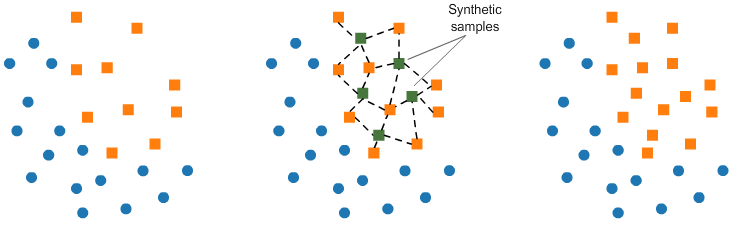

* Vantagem: Gera novas amostras entre os dois vizinhos fazendo assim uma maior suavização dos dados e reduz o risco de overfitting
* Desvantagem: Aumento do ruido, já que não necessariamente os dados gerados vão seguir um padrão linear previsivel

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=random_state_number)

X_train, y_train = smt.fit_resample(X_trainB, y_trainB)


print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('Total:', round(y_train.value_counts()[0] + y_train.value_counts()[1]))

Genuine: 17929 / 50.0 % of the dataset
Frauds: 17929 / 50.0 % of the dataset
Total: 35858


Achar o melhor modelo com melhor parametro usando GridSearch

In [ ]:
smote_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_smote = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_smote.best_params_)
  print(' Best recall score:', grid_smote.best_score_)


  y_pred = grid_smote.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  #print(cm)

  print(" Valores de Cross Validation")
  score_smote = cross_val_score(grid_smote.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  # print(" Cross Validation Recall scores are: {}".format(score_smote))
  score_smote_mean = score_smote.mean()
  print(" Average Cross Validation Recall score: {}".format(score_smote.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'SMOTE',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_smote_mean,
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  smote_score = pd.concat([smote_score, score], ignore_index=True)

  print()

RandomForest
 Best parameters: {'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.9746213884849813
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.973886230390986

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.6878238038801688
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6883814724677496

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6887719355031472
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.688493452878643

CatBoost
 Best parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.3, 'random_state': 21}
 Best recall score: 0.9563832998864632
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.9476575564381269

XGBoost
 Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.9577777667118157
 Valores de Cross Validati

In [ ]:
display(smote_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,SMOTE,0.278689,0.973886,0.365591,0.316279,0.937804
1,LogisticRegression,SMOTE,0.651639,0.688381,0.112130,0.191336,0.715676
2,SVC,SMOTE,0.647541,0.688493,0.111503,0.190247,0.715464
3,CatBoost,SMOTE,0.176230,0.947658,0.467391,0.255952,0.947112
4,XGBoost,SMOTE,0.184426,0.953294,0.459184,0.263158,0.946689
5,LightGBM,SMOTE,0.151639,0.952512,0.415730,0.222222,0.945208


## RandomUnderSample

### RandomUnderSampler

* Localiza a classe majoritaria
* Remove amostras aleatorias dessa classe até ter a mesma quantidade da classe minoritaria
* Vantagem: Ao contrario do OverSample, esse não duplica os dados logo é bem mais baixa a probabilidade de overfitting
* Desvantagem: Perde bastante amostras, que pode gerar um desempenho pior no modelo

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=random_state_number, sampling_strategy='majority')

X_train, y_train = rus.fit_resample(X_trainB, y_trainB)

print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('Total:', round(y_train.value_counts()[0] + y_train.value_counts()[1]))

Genuine: 978 / 50.0 % of the dataset
Frauds: 978 / 50.0 % of the dataset
Total: 1956


Achar o melhor modelo com melhor parametro usando GridSearch

In [ ]:
runder_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_under = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_under.best_params_)
  print(' Best recall score:', grid_under.best_score_)


  y_pred = grid_under.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  #print(cm)

  print(" Valores de Cross Validation")
  score_runder = cross_val_score(grid_under.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  # print(" Cross Validation Recall scores are: {}".format(score_runder))
  score_runder_mean = score_runder.mean()
  print(" Average Cross Validation Recall score: {}".format(score_runder.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'Random Undersampling',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_runder_mean, #score_runder_mean
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  runder_score = pd.concat([runder_score, score], ignore_index=True)

  print()

RandomForest
 Best parameters: {'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.7300757416368608
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.723937074829932

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.707574163686093
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.7004464285714286

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6738270565958342
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6769345238095237

CatBoost
 Best parameters: {'depth': 6, 'iterations': 10, 'learning_rate': 0.01, 'random_state': 21}
 Best recall score: 0.7740795287187039
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.7495323129251701

XGBoost
 Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'random_state': 21}
 Best recall score: 0.8282558384178413
 Valores de Cross Validati

In [ ]:
display(runder_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,Random Undersampling,0.684426,0.723937,0.137336,0.228767,0.761794
1,LogisticRegression,Random Undersampling,0.651639,0.700446,0.105438,0.181507,0.696636
2,SVC,Random Undersampling,0.627049,0.676935,0.110870,0.188424,0.721176
3,CatBoost,Random Undersampling,0.770492,0.749532,0.130014,0.222485,0.722022
4,XGBoost,Random Undersampling,0.831967,0.828316,0.116868,0.204947,0.666808
5,LightGBM,Random Undersampling,0.737705,0.732143,0.141509,0.237467,0.755447


## Tomek

### Tomek

* Localiza um par mais proximo de classes diferentes (Fraudes e não fraudes)
* Remove um ou os dois pares começando pela classe majoritaria
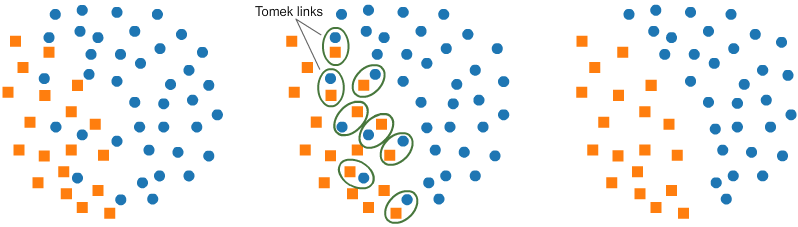

* Vantagem: Deixa a fronteira entre essas classes mais definidas
* Desvantagem: Ainda estamos removendo dados que podem ser cruciais


In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tomek = TomekLinks()

X_train, y_train = tomek.fit_resample(X_trainB, y_trainB)

print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('Total:', round(y_train.value_counts()[0] + y_train.value_counts()[1]))

Genuine: 17527 / 94.71 % of the dataset
Frauds: 978 / 5.29 % of the dataset
Total: 18505


Achar o melhor modelo com melhor parametro usando GridSearch

In [ ]:
tomek_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_tomek = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_tomek.best_params_)
  print(' Best recall score:', grid_tomek.best_score_)


  y_pred = grid_tomek.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  #print(cm)

  print(" Valores de Cross Validation")
  score_tomek = cross_val_score(grid_tomek.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  # print(" Cross Validation Recall scores are: {}".format(score_tomek))
  score_tomek_mean = score_tomek.mean()
  print(" Average Cross Validation Recall score: {}".format(score_tomek.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'Tomek',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_tomek_mean,
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  tomek_score = pd.concat([tomek_score, score], ignore_index=True)

  print()

RandomForest
 Best parameters: {'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.20453397853986957
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.20546343537414966

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.6871554807490006
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.68703231292517

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6851041447506837
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6829294217687074

CatBoost
 Best parameters: {'depth': 3, 'iterations': 10, 'learning_rate': 0.01, 'random_state': 21}
 Best recall score: 0.8251840942562592
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.8251275510204081

XGBoost
 Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'random_state': 21}
 Best recall score: 0.2249526614769619
 Valores de Cross Valida

In [ ]:
display(tomek_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,Tomek,0.172131,0.205463,0.608696,0.268371,0.951555
1,LogisticRegression,Tomek,0.655738,0.687032,0.110345,0.188902,0.709329
2,SVC,Tomek,0.651639,0.682929,0.112051,0.191221,0.715464
3,CatBoost,Tomek,0.831967,0.825128,0.117070,0.205258,0.667442
4,XGBoost,Tomek,0.188525,0.229953,0.474227,0.269795,0.947324
5,LightGBM,Tomek,0.237705,0.226871,0.426471,0.305263,0.944151


## SMOTETomek

### SMOTETomek

* Usa primeiramente o SMOKE para gerar dados interpolados da classe minoritaria
* Usa o Tomek para remover os dados proximos de ambas as classes
* Vantagens: A suavização dos dados pelo SMOTE e a classe mais definida pelo TOMEK
* Desvantagens: Perda de informação já que todas as amostras originais podem ser apagadas e subistiuidas pelas geradas com SMOTE é mais complexo computacionalmente já que temos que rodar os dois algoritimos

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [ ]:
smotok = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=random_state_number)

X_train, y_train = smotok.fit_resample(X_trainB, y_trainB)

print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')
print('Total:', round(y_train.value_counts()[0] + y_train.value_counts()[1]))

Genuine: 17900 / 49.96 % of the dataset
Frauds: 17929 / 50.04 % of the dataset
Total: 35829


Achar o melhor modelo com melhor parametro usando GridSearch

In [ ]:
smotok_score = pd.DataFrame(columns=['Model','Sample','Recall','Recall CrossValidation','Precision','F1 Score','Accuracy'])
for model_name, model in models.items():
  print(model_name)

  grid_smotok = GridSearchCV(model, params[model_name], cv=kf, scoring='recall').fit(X_train, y_train)
  print(' Best parameters:', grid_smotok.best_params_)
  print(' Best recall score:', grid_smotok.best_score_)


  y_pred = grid_smotok.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  #print(cm)

  print(" Valores de Cross Validation")
  score_smotok = cross_val_score(grid_smotok.best_estimator_, X_train, y_train, cv=cv, scoring='recall')
  # print(" Cross Validation Recall scores are: {}".format(score_smotok))
  score_smotok_mean = score_smotok.mean()
  print(" Average Cross Validation Recall score: {}".format(score_smotok.mean()))

  rf_Recall = recall_score(y_test, y_pred)
  rf_Precision = precision_score(y_test, y_pred)
  rf_f1 = f1_score(y_test, y_pred)
  rf_accuracy = accuracy_score(y_test, y_pred)

  score = pd.DataFrame([{
    'Model': model_name,
    'Sample': 'SMOTETomek',
    'Recall': rf_Recall,
    'Recall CrossValidation': score_smotok_mean,
    'Precision': rf_Precision,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy
  }])

  smotok_score = pd.concat([smotok_score, score], ignore_index=True)

  print()

RandomForest
 Best parameters: {'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.975347332881842
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.9740769081462016

LogisticRegression
 Best parameters: {'C': 0.01, 'random_state': 21, 'solver': 'liblinear'}
 Best recall score: 0.6886055207254402
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6884911510590859

SVC
 Best parameters: {'C': 0.1, 'random_state': 21}
 Best recall score: 0.6893306559238307
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.6887140542881032

CatBoost
 Best parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.3, 'random_state': 21}
 Best recall score: 0.9568857498904471
 Valores de Cross Validation
 Average Cross Validation Recall score: 0.9487159579550883

XGBoost
 Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'random_state': 21}
 Best recall score: 0.9596185687395427
 Valores de Cross Validat

In [ ]:
display(smotok_score)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,SMOTETomek,0.266393,0.974077,0.342105,0.299539,0.935689
1,LogisticRegression,SMOTETomek,0.651639,0.688491,0.112051,0.191221,0.715464
2,SVC,SMOTETomek,0.647541,0.688714,0.111425,0.190132,0.715253
3,CatBoost,SMOTETomek,0.180328,0.948716,0.468085,0.260355,0.947112
4,XGBoost,SMOTETomek,0.188525,0.953454,0.414414,0.259155,0.944362
5,LightGBM,SMOTETomek,0.159836,0.952061,0.410526,0.230088,0.944785


# Resultados

## Classificação

Em um conjunto desbalanceado a Accuracy não significa muita coisa, podemos tem uma precisão de 95% nesse dataset se chutarmos que todos não são fraudes por isso precisamos usar outras metricas

Recall: $\frac{TP}{TP + FN}$ Mede a capacidade do modelo de encontar todos os casos positivos, é algo que queremos já que no contexto de prevenção de fraudes é importante detectar elas mesmo tendo uma taxa maior de falsos positivos

Precision: $\frac{TP}{TP + FP}$ mede a qualidade das previsões positivas do modelo. É importante em situações onde o custo de falsos positivos é alto, que não é nosso caso mas mesmo assim é bom manter um valor alto, já que muitos falsos positivos deixaria o sistema mais inconveniente para o usuario final que útil

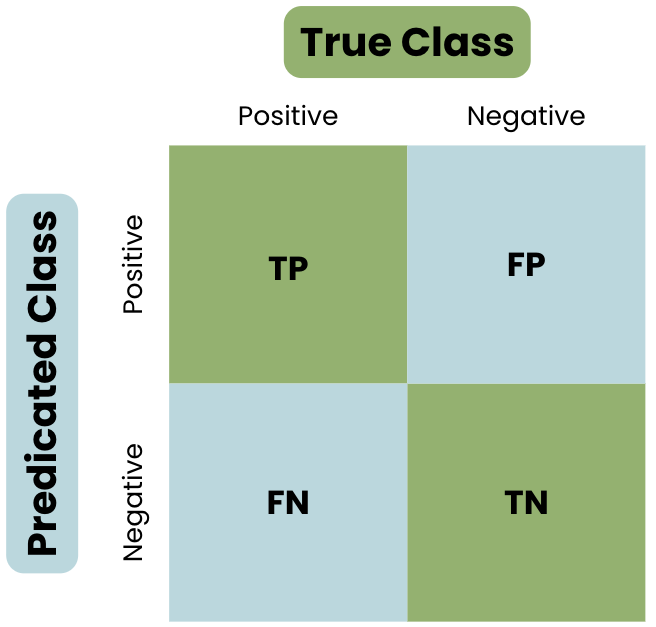

In [ ]:
predictions = pd.concat([no_score, rover_score, smote_score, runder_score, tomek_score, smotok_score], ignore_index=True, sort=False)
print(f"Recall com {n_splits} splits")
#display(predictions.sort_values(by=['Recall'], ascending=False))
display(predictions)

Recall com 10 splits


,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,No Under/Oversampling,0.151639,0.181973,0.649123,0.245847,0.951978
1,LogisticRegression,No Under/Oversampling,0.651639,0.683992,0.111736,0.190762,0.714618
2,SVC,No Under/Oversampling,0.651639,0.679889,0.114306,0.194495,0.721388
3,CatBoost,No Under/Oversampling,0.831967,0.824107,0.117138,0.205362,0.667654
4,XGBoost,No Under/Oversampling,0.176230,0.204507,0.472527,0.256716,0.947324
5,LightGBM,No Under/Oversampling,0.184426,0.218771,0.441176,0.260116,0.945843
6,RandomForest,Random Oversampling,0.188525,1.000000,0.479167,0.270588,0.947535
7,LogisticRegression,Random Oversampling,0.651639,0.686152,0.111034,0.189737,0.712714
8,SVC,Random Oversampling,0.651639,0.680296,0.113087,0.192727,0.718215
9,CatBoost,Random Oversampling,0.336066,0.999833,0.258675,0.292335,0.916014


In [ ]:
display(predictions)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,No Under/Oversampling,0.151639,0.181973,0.649123,0.245847,0.951978
1,LogisticRegression,No Under/Oversampling,0.651639,0.683992,0.111736,0.190762,0.714618
2,SVC,No Under/Oversampling,0.651639,0.679889,0.114306,0.194495,0.721388
3,CatBoost,No Under/Oversampling,0.831967,0.824107,0.117138,0.205362,0.667654
4,XGBoost,No Under/Oversampling,0.176230,0.204507,0.472527,0.256716,0.947324
5,LightGBM,No Under/Oversampling,0.184426,0.218771,0.441176,0.260116,0.945843
6,RandomForest,Random Oversampling,0.188525,1.000000,0.479167,0.270588,0.947535
7,LogisticRegression,Random Oversampling,0.651639,0.686152,0.111034,0.189737,0.712714
8,SVC,Random Oversampling,0.651639,0.680296,0.113087,0.192727,0.718215
9,CatBoost,Random Oversampling,0.336066,0.999833,0.258675,0.292335,0.916014


Como a maioria dos RandomOverSample derão overfitting, vamos remover eles?

In [ ]:
predictions_filtered = predictions[predictions['Model'] != 'RandomOverSample']
display(predictions_filtered)

,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,No Under/Oversampling,0.151639,0.181973,0.649123,0.245847,0.951978
1,LogisticRegression,No Under/Oversampling,0.651639,0.683992,0.111736,0.190762,0.714618
2,SVC,No Under/Oversampling,0.651639,0.679889,0.114306,0.194495,0.721388
3,CatBoost,No Under/Oversampling,0.831967,0.824107,0.117138,0.205362,0.667654
4,XGBoost,No Under/Oversampling,0.176230,0.204507,0.472527,0.256716,0.947324
5,LightGBM,No Under/Oversampling,0.184426,0.218771,0.441176,0.260116,0.945843
6,RandomForest,Random Oversampling,0.188525,1.000000,0.479167,0.270588,0.947535
7,LogisticRegression,Random Oversampling,0.651639,0.686152,0.111034,0.189737,0.712714
8,SVC,Random Oversampling,0.651639,0.680296,0.113087,0.192727,0.718215
9,CatBoost,Random Oversampling,0.336066,0.999833,0.258675,0.292335,0.916014


## Runtime
1 hora +- usando aceleração de GPU <br>
GPU T4 <br>
Executado no Google Colab

In [ ]:
import pandas as pd

# Dados fornecidos
data = {
    "Model": ["RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM",
              "RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM",
              "RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM",
              "RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM",
              "RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM",
              "RandomForest", "LogisticRegression", "SVC", "CatBoost", "XGBoost", "LightGBM"],
    "Sample": ["No Under/Oversampling"] * 6 + ["Random Oversampling"] * 6 + ["SMOTE"] * 6 +
              ["Random Undersampling"] * 6 + ["Tomek"] * 6 + ["SMOTETomek"] * 6,
    "Recall": [0.151639, 0.651639, 0.651639, 0.831967, 0.176230, 0.184426,
               0.188525, 0.651639, 0.651639, 0.336066, 0.274590, 0.327869,
               0.278689, 0.651639, 0.647541, 0.176230, 0.184426, 0.151639,
               0.684426, 0.651639, 0.627049, 0.770492, 0.831967, 0.737705,
               0.172131, 0.655738, 0.651639, 0.831967, 0.188525, 0.237705,
               0.266393, 0.651639, 0.647541, 0.180328, 0.188525, 0.159836],
    "Recall CrossValidation": [0.181973, 0.683992, 0.679889, 0.824107, 0.204507, 0.218771,
                               1.000000, 0.686152, 0.680296, 0.999833, 1.000000, 1.000000,
                               0.973886, 0.688381, 0.688493, 0.947658, 0.953294, 0.952512,
                               0.723937, 0.700446, 0.676935, 0.749532, 0.828316, 0.732143,
                               0.205463, 0.687032, 0.682929, 0.825128, 0.229953, 0.226871,
                               0.974077, 0.688491, 0.688714, 0.948716, 0.953454, 0.952061],
    "Precision": [0.649123, 0.111736, 0.114306, 0.117138, 0.472527, 0.441176,
                  0.479167, 0.111034, 0.113087, 0.258675, 0.347150, 0.287770,
                  0.365591, 0.112130, 0.111503, 0.467391, 0.459184, 0.415730,
                  0.137336, 0.105438, 0.110870, 0.130014, 0.116868, 0.141509,
                  0.608696, 0.110345, 0.112051, 0.117070, 0.474227, 0.426471,
                  0.342105, 0.112051, 0.111425, 0.468085, 0.414414, 0.410526],
    "F1 Score": [0.245847, 0.190762, 0.194495, 0.205362, 0.256716, 0.260116,
                 0.270588, 0.189737, 0.192727, 0.292335, 0.306636, 0.306513,
                 0.316279, 0.191336, 0.190247, 0.255952, 0.263158, 0.222222,
                 0.228767, 0.181507, 0.188424, 0.222485, 0.204947, 0.237467,
                 0.268371, 0.188902, 0.191221, 0.205258, 0.269795, 0.305263,
                 0.299539, 0.191221, 0.190132, 0.260355, 0.259155, 0.230088],
    "Accuracy": [0.951978, 0.714618, 0.721388, 0.667654, 0.947324, 0.945843,
                 0.947535, 0.712714, 0.718215, 0.916014, 0.935900, 0.923419,
                 0.937804, 0.715676, 0.715464, 0.947112, 0.946689, 0.945208,
                 0.761794, 0.696636, 0.721176, 0.722022, 0.666808, 0.755447,
                 0.951555, 0.709329, 0.715464, 0.667442, 0.947324, 0.944151,
                 0.935689, 0.715464, 0.715253, 0.947112, 0.944362, 0.944785]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Mostrando o DataFrame
display(df.sort_values(by=['Precision'], ascending=False))


,Model,Sample,Recall,Recall CrossValidation,Precision,F1 Score,Accuracy
0,RandomForest,No Under/Oversampling,0.151639,0.181973,0.649123,0.245847,0.951978
24,RandomForest,Tomek,0.172131,0.205463,0.608696,0.268371,0.951555
6,RandomForest,Random Oversampling,0.188525,1.000000,0.479167,0.270588,0.947535
28,XGBoost,Tomek,0.188525,0.229953,0.474227,0.269795,0.947324
4,XGBoost,No Under/Oversampling,0.176230,0.204507,0.472527,0.256716,0.947324
33,CatBoost,SMOTETomek,0.180328,0.948716,0.468085,0.260355,0.947112
15,CatBoost,SMOTE,0.176230,0.947658,0.467391,0.255952,0.947112
16,XGBoost,SMOTE,0.184426,0.953294,0.459184,0.263158,0.946689
5,LightGBM,No Under/Oversampling,0.184426,0.218771,0.441176,0.260116,0.945843
29,LightGBM,Tomek,0.237705,0.226871,0.426471,0.305263,0.944151
